In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

In [151]:
print(make_swiss_roll.__doc__)

Generate a swiss roll dataset.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, default=100
        The number of sample points on the Swiss Roll.

    noise : float, default=0.0
        The standard deviation of the gaussian noise.

    random_state : int, RandomState instance or None, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.

    hole : bool, default=False
        If True generates the swiss roll with hole dataset.

    Returns
    -------
    X : ndarray of shape (n_samples, 3)
        The points.

    t : ndarray of shape (n_samples,)
        The univariate position of the sample according to the main dimension
        of the points in the manifold.

    Notes
    -----
    The algorithm is from Marsland [1].

    References
    ----------
    .. [1] S. Marsland,

In [152]:
n_samples = 10_000 # 10_000 means 10k
data, t = make_swiss_roll(n_samples=n_samples)
data = data[:, [2, 0]] / 10 # scale data and using only 2 dimensions (z and x)
data = data * np.array([1, -1]) # flip x axis

(-2.0, 2.0)

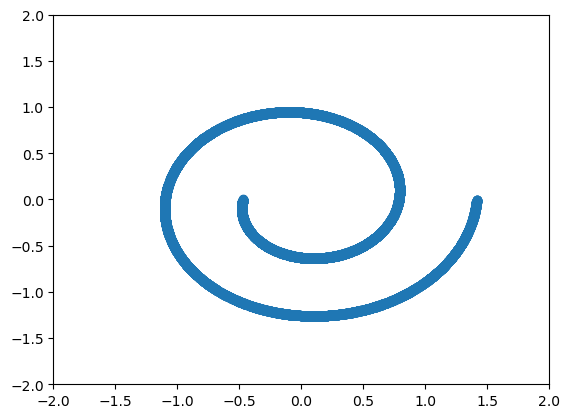

In [153]:
# plot the data
plt.scatter(data[:, 0], data[:,1])
plt.xlim(-2, 2)
plt.ylim(-2, 2)

In [154]:
import torch

def forward_process(data, T, betas):

    for t in range(T):
        beta_t = betas[t]
        mu = data * torch.sqrt(1 - beta_t)
        std = torch.sqrt(beta_t)

        # Sample from q(x_t | x_{t-1})
        data = mu + torch.randn_like(data) * std # sample from normal distribution with mean mu and std std (Reparametrization trick)

    return data

In [155]:
T = 40
betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5
xT = forward_process(torch.from_numpy(data), T, betas)

In [156]:
print(xT.mean(0))
print(xT.std(0))

tensor([-0.0078, -0.0307], dtype=torch.float64)
tensor([0.9893, 0.9991], dtype=torch.float64)


(-4.0, 4.0)

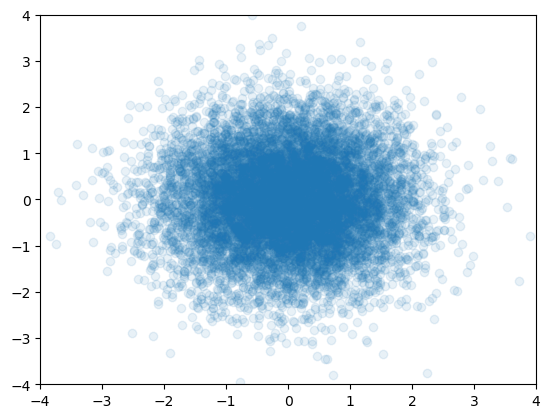

In [157]:
#plot the data
plt.scatter(xT[:, 0].data.numpy(), xT[:,1].data.numpy(), alpha=0.1)
plt.xlim(-4, 4)
plt.ylim(-4, 4)